In [39]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/uberdrives/My Uber Drives - 2016.csv


# LOAD THE DATASET

In [40]:
drives = pd.read_csv('/kaggle/input/uberdrives/My Uber Drives - 2016.csv')

# ASSESSING DATA

In [41]:
#Get the first 5 rows of the dataset
drives.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [42]:
#Get the info of the dataset
drives.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [43]:
#Get the size of the dataset
drives.size

8092

In [44]:
#Get the shape of the dataset
drives.shape

(1156, 7)

In [45]:
#Get the summary statistics 
drives.describe()

,MILES*
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [46]:
#Datatype of the dataframe
drives.dtypes


START_DATE*     object
END_DATE*       object
CATEGORY*       object
START*          object
STOP*           object
MILES*         float64
PURPOSE*        object
dtype: object

In [47]:
#Count of total values of each Category
drives['CATEGORY*'].value_counts()

CATEGORY*
Business    1078
Personal      77
Name: count, dtype: int64

In [48]:
drives['START*'].value_counts()

START*
Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
                   ... 
Florence              1
Ridgeland             1
Daytona Beach         1
Sky Lake              1
Gampaha               1
Name: count, Length: 177, dtype: int64

In [49]:
drives['STOP*'].value_counts()

STOP*
Cary                 203
Unknown Location     149
Morrisville           84
Whitebridge           65
Islamabad             58
                    ... 
Daytona Beach          1
Sand Lake Commons      1
Sky Lake               1
Vista East             1
Ilukwatta              1
Name: count, Length: 188, dtype: int64

In [50]:
drives['PURPOSE*'].value_counts()

PURPOSE*
Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: count, dtype: int64

In [51]:
drives['MILES*'].value_counts()

MILES*
9.9        28
3.1        26
2.1        19
10.4       19
3.0        19
           ..
30.0        1
46.9        1
40.2        1
16.6        1
12204.7     1
Name: count, Length: 257, dtype: int64

# DATA QUALITY ISSUES CHECK

In [52]:
#Check for nulls
drives.isna().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

The purpose column has the highes null values

In [53]:
#uniqueness check
drives.duplicated().sum()

1

In [54]:
drives.dtypes

START_DATE*     object
END_DATE*       object
CATEGORY*       object
START*          object
STOP*           object
MILES*         float64
PURPOSE*        object
dtype: object



The datatypes of START_DATE and END_DATE are incorrect. Additionally, we need to create a separate column for start time and end time.




In [55]:
drives.describe()

,MILES*
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In the describtive statistics the max value is too high, we can check if it is an outlier or not

In [56]:
drives[drives['MILES*']==12204.7]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


As we can see, there is only one column with the value and no proper information about this outlier.  we should remove it in the cleaning process


## DATA QUALITY ISSUES
Null values in the **PURPOSE*** column.

Only one duplicated value is present.

The maximum value for **Miles*** is an outlier with no proper information.

Incorrect datatypes for **START_DATE*** and **END_DATE***.

Change the names of the headers.



# CLEANING DATA

In [57]:
#copy the datafame
drives_copy=drives.copy()

In [58]:
#Drop the maximum value of the dataframe
drives_copy = drives_copy.drop(1155)

In [59]:
drives_copy[['Start_Date', 'Start_Time']] = drives_copy['START_DATE*'].str.split(n=1, expand=True)
drives_copy['Start_Time'] = drives_copy['Start_Time'].str.split().str[-1]

In [60]:
drives_copy[['End_Date', 'End_Time']] = drives_copy['END_DATE*'].str.split(n=1, expand=True)
drives_copy['End_Time'] = drives_copy['End_Time'].str.split().str[-1]

In [61]:
drives_copy = drives_copy.drop(columns=['START_DATE*', 'END_DATE*'])


In [62]:
drives_copy.drop_duplicates()

,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,Start_Date,Start_Time,End_Date,End_Time
0,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,1/1/2016,21:11,1/1/2016,21:17
1,Business,Fort Pierce,Fort Pierce,5.0,NaN,1/2/2016,1:25,1/2/2016,1:37
2,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,1/2/2016,20:25,1/2/2016,20:38
3,Business,Fort Pierce,Fort Pierce,4.7,Meeting,1/5/2016,17:31,1/5/2016,17:45
4,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,1/6/2016,14:42,1/6/2016,15:49
...,...,...,...,...,...,...,...,...,...
1150,Business,Kar?chi,Kar?chi,0.7,Meeting,12/31/2016,1:07,12/31/2016,1:14
1151,Business,Kar?chi,Unknown Location,3.9,Temporary Site,12/31/2016,13:24,12/31/2016,13:42
1152,Business,Unknown Location,Unknown Location,16.2,Meeting,12/31/2016,15:03,12/31/2016,15:38
1153,Business,Katunayake,Gampaha,6.4,Temporary Site,12/31/2016,21:32,12/31/2016,21:50


In [63]:
drives_copy['PURPOSE*'] = drives_copy['PURPOSE*'].fillna(drives_copy['PURPOSE*'].mode()[0])


In [64]:
drives_copy.columns = drives_copy.columns.str.replace('*', '')


In [65]:
drives_copy

,CATEGORY,START,STOP,MILES,PURPOSE,Start_Date,Start_Time,End_Date,End_Time
0,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,1/1/2016,21:11,1/1/2016,21:17
1,Business,Fort Pierce,Fort Pierce,5.0,Meeting,1/2/2016,1:25,1/2/2016,1:37
2,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,1/2/2016,20:25,1/2/2016,20:38
3,Business,Fort Pierce,Fort Pierce,4.7,Meeting,1/5/2016,17:31,1/5/2016,17:45
4,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,1/6/2016,14:42,1/6/2016,15:49
...,...,...,...,...,...,...,...,...,...
1150,Business,Kar?chi,Kar?chi,0.7,Meeting,12/31/2016,1:07,12/31/2016,1:14
1151,Business,Kar?chi,Unknown Location,3.9,Temporary Site,12/31/2016,13:24,12/31/2016,13:42
1152,Business,Unknown Location,Unknown Location,16.2,Meeting,12/31/2016,15:03,12/31/2016,15:38
1153,Business,Katunayake,Gampaha,6.4,Temporary Site,12/31/2016,21:32,12/31/2016,21:50


In [66]:
drives_copy.dtypes

CATEGORY       object
START          object
STOP           object
MILES         float64
PURPOSE        object
Start_Date     object
Start_Time     object
End_Date       object
End_Time       object
dtype: object

In [67]:
from datetime import datetime
from datetime import datetime

def calculate_duration_in_minutes(start_time_str, end_time_str):
    start_time = datetime.strptime(start_time_str, '%H:%M')
    end_time = datetime.strptime(end_time_str, '%H:%M')
    
    # Check if end time is earlier than start time
    if end_time < start_time:
        # Add 1 day to the end time to handle cases where the end time is on the next day
        end_time = end_time.replace(day=end_time.day + 1)
    
    duration = end_time - start_time
    total_minutes = duration.total_seconds() / 60
    return total_minutes

# Apply the function to create a new 'Duration' column
drives_copy['Duration'] = drives_copy.apply(lambda row: calculate_duration_in_minutes(row['Start_Time'], row['End_Time']), axis=1)

In [68]:
drives_copy

,CATEGORY,START,STOP,MILES,PURPOSE,Start_Date,Start_Time,End_Date,End_Time,Duration
0,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,1/1/2016,21:11,1/1/2016,21:17,6.0
1,Business,Fort Pierce,Fort Pierce,5.0,Meeting,1/2/2016,1:25,1/2/2016,1:37,12.0
2,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,1/2/2016,20:25,1/2/2016,20:38,13.0
3,Business,Fort Pierce,Fort Pierce,4.7,Meeting,1/5/2016,17:31,1/5/2016,17:45,14.0
4,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,1/6/2016,14:42,1/6/2016,15:49,67.0
...,...,...,...,...,...,...,...,...,...,...
1150,Business,Kar?chi,Kar?chi,0.7,Meeting,12/31/2016,1:07,12/31/2016,1:14,7.0
1151,Business,Kar?chi,Unknown Location,3.9,Temporary Site,12/31/2016,13:24,12/31/2016,13:42,18.0
1152,Business,Unknown Location,Unknown Location,16.2,Meeting,12/31/2016,15:03,12/31/2016,15:38,35.0
1153,Business,Katunayake,Gampaha,6.4,Temporary Site,12/31/2016,21:32,12/31/2016,21:50,18.0


In [69]:
# Display the unique values in the 'START' column
print("Before correction:")
print(drives_copy['START'].unique())

Before correction:
['Fort Pierce' 'West Palm Beach' 'Cary' 'Jamaica' 'New York' 'Elmhurst'
 'Midtown' 'East Harlem' 'Flatiron District' 'Midtown East'
 'Hudson Square' 'Lower Manhattan' "Hell's Kitchen" 'Downtown' 'Gulfton'
 'Houston' 'Eagan Park' 'Morrisville' 'Durham' 'Farmington Woods'
 'Whitebridge' 'Lake Wellingborough' 'Fayetteville Street' 'Raleigh'
 'Hazelwood' 'Fairmont' 'Meredith Townes' 'Apex' 'Chapel Hill'
 'Northwoods' 'Edgehill Farms' 'Tanglewood' 'Preston' 'Eastgate'
 'East Elmhurst' 'Jackson Heights' 'Long Island City' 'Katunayaka'
 'Unknown Location' 'Colombo' 'Nugegoda' 'Islamabad' 'R?walpindi'
 'Noorpur Shahan' 'Heritage Pines' 'Westpark Place' 'Waverly Place'
 'Wayne Ridge' 'Weston' 'East Austin' 'West University' 'South Congress'
 'The Drag' 'Congress Ave District' 'Red River District' 'Georgian Acres'
 'North Austin' 'Coxville' 'Convention Center District' 'Austin' 'Katy'
 'Sharpstown' 'Sugar Land' 'Galveston' 'Port Bolivar' 'Washington Avenue'
 'Briar Meadow' 'La

In [70]:
# Correct the value by replacing '?' with the correct character, for example, 'i'

drives_copy['START'] = drives_copy['START'].replace('Karacha', 'Karachi')


In [71]:
drives_copy['STOP'] = drives_copy['STOP'].replace('Kar?chi', 'Karachi')


In [72]:
drives_copy

,CATEGORY,START,STOP,MILES,PURPOSE,Start_Date,Start_Time,End_Date,End_Time,Duration
0,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,1/1/2016,21:11,1/1/2016,21:17,6.0
1,Business,Fort Pierce,Fort Pierce,5.0,Meeting,1/2/2016,1:25,1/2/2016,1:37,12.0
2,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,1/2/2016,20:25,1/2/2016,20:38,13.0
3,Business,Fort Pierce,Fort Pierce,4.7,Meeting,1/5/2016,17:31,1/5/2016,17:45,14.0
4,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,1/6/2016,14:42,1/6/2016,15:49,67.0
...,...,...,...,...,...,...,...,...,...,...
1150,Business,Kar?chi,Karachi,0.7,Meeting,12/31/2016,1:07,12/31/2016,1:14,7.0
1151,Business,Kar?chi,Unknown Location,3.9,Temporary Site,12/31/2016,13:24,12/31/2016,13:42,18.0
1152,Business,Unknown Location,Unknown Location,16.2,Meeting,12/31/2016,15:03,12/31/2016,15:38,35.0
1153,Business,Katunayake,Gampaha,6.4,Temporary Site,12/31/2016,21:32,12/31/2016,21:50,18.0


In [73]:
drives_copy.dtypes

CATEGORY       object
START          object
STOP           object
MILES         float64
PURPOSE        object
Start_Date     object
Start_Time     object
End_Date       object
End_Time       object
Duration      float64
dtype: object

In [74]:
# Convert 'start_date' to datetime if it's not already
drives_copy['Start_Date'] = pd.to_datetime(drives_copy['Start_Date'])

# Extract the month using strftime and create a new column 'month'
drives_copy['Start_Month'] = drives_copy['Start_Date'].dt.strftime('%B')

In [75]:
# Convert 'start_date' to datetime if it's not already
drives_copy['End_Date'] = pd.to_datetime(drives_copy['End_Date'])

# Extract the month using strftime and create a new column 'month'
drives_copy['End_month'] = drives_copy['End_Date'].dt.strftime('%B')

In [76]:
drives_copy

,CATEGORY,START,STOP,MILES,PURPOSE,Start_Date,Start_Time,End_Date,End_Time,Duration,Start_Month,End_month
0,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21:11,2016-01-01,21:17,6.0,January,January
1,Business,Fort Pierce,Fort Pierce,5.0,Meeting,2016-01-02,1:25,2016-01-02,1:37,12.0,January,January
2,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20:25,2016-01-02,20:38,13.0,January,January
3,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17:31,2016-01-05,17:45,14.0,January,January
4,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14:42,2016-01-06,15:49,67.0,January,January
...,...,...,...,...,...,...,...,...,...,...,...,...
1150,Business,Kar?chi,Karachi,0.7,Meeting,2016-12-31,1:07,2016-12-31,1:14,7.0,December,December
1151,Business,Kar?chi,Unknown Location,3.9,Temporary Site,2016-12-31,13:24,2016-12-31,13:42,18.0,December,December
1152,Business,Unknown Location,Unknown Location,16.2,Meeting,2016-12-31,15:03,2016-12-31,15:38,35.0,December,December
1153,Business,Katunayake,Gampaha,6.4,Temporary Site,2016-12-31,21:32,2016-12-31,21:50,18.0,December,December


# EXPLORATORY DATA ANALYSIS

lets answer these questions

. What is the average length of the trip?


• Average number of rides per week or per month?

 
• Percentage of business miles vs personal vs. Meals


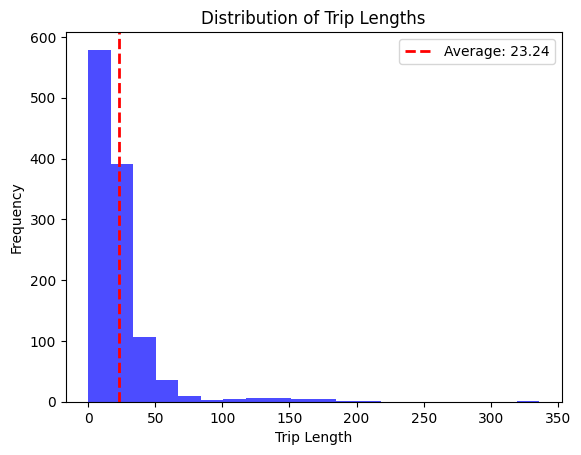

In [77]:
# Generate a histogram of trip lengths
plt.hist(drives_copy['Duration'], bins=20, color='blue', alpha=0.7)

# Add a vertical line for the average trip length
average_trip_length = drives_copy['Duration'].mean()
plt.axvline(average_trip_length, color='red', linestyle='dashed', linewidth=2, label=f'Average: {average_trip_length:.2f}')

# Add labels and title
plt.xlabel('Trip Length')
plt.ylabel('Frequency')
plt.title('Distribution of Trip Lengths')
plt.legend()

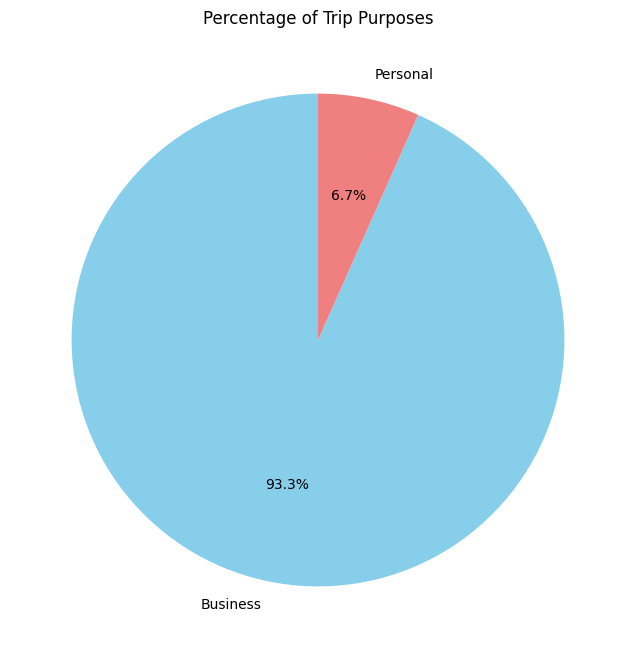

In [83]:
drives_copy_purpose = drives_copy['CATEGORY'].value_counts(normalize=True) * 100

# Create a pie chart using matplotlib
plt.figure(figsize=(8, 8))
plt.pie(drives_copy_purpose, labels=drives_copy_purpose.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Percentage of Trip Purposes')
plt.show()

TypeError: unsupported operand type(s) for -: 'str' and 'str'